In [1]:
from keras_preprocessing.image import ImageDataGenerator

In [2]:
predictions_dir='./sample/prediction'

In [3]:
predictions_datagen=ImageDataGenerator()#rescale=1./255)
predictions_generator=predictions_datagen.flow_from_directory(
    predictions_dir,
    target_size=(224,224),
    batch_size=20,
    shuffle=False,
    color_mode='rgb')
pred_X,_=predictions_generator.next()

Found 16 images belonging to 1 classes.


C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [4]:
pred_X = pred_X.astype('uint8')
pred_X.shape,pred_X.dtype

((16, 224, 224, 3), dtype('uint8'))

In [5]:
# from tensorflow.keras.models import load_model
from keras.models import load_model

In [6]:
pred_model = load_model('newVGG16.h5')#,compile=False

In [7]:
predictions = pred_model.predict(pred_X)

In [8]:
predictions

array([[9.32815254e-01, 6.71847612e-02],
       [2.57445246e-01, 7.42554724e-01],
       [3.32161427e-01, 6.67838573e-01],
       [7.87441898e-03, 9.92125571e-01],
       [2.30998993e-02, 9.76900101e-01],
       [3.84759039e-01, 6.15240991e-01],
       [2.80767620e-01, 7.19232380e-01],
       [9.22419224e-03, 9.90775764e-01],
       [4.21636343e-01, 5.78363657e-01],
       [9.11318839e-01, 8.86810943e-02],
       [9.89748299e-01, 1.02516785e-02],
       [7.89612353e-01, 2.10387588e-01],
       [8.24010551e-01, 1.75989464e-01],
       [5.87114990e-01, 4.12885010e-01],
       [9.99984026e-01, 1.59210940e-05],
       [4.85909373e-01, 5.14090538e-01]], dtype=float32)

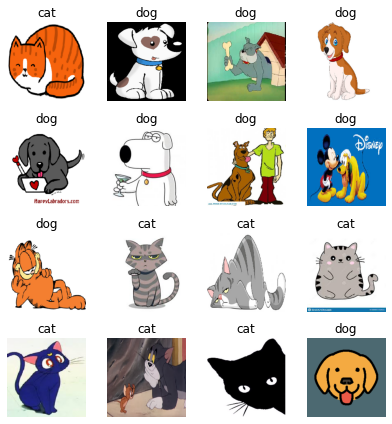

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
labels=['cat', 'dog']
number = len(predictions)
for i in range(number):
    plt.figure(num = number,figsize=(6,6))
    plt.subplot(4,4,i+1)
    plt.title(labels[np.argmax(predictions[i])])
    plt.imshow(pred_X[i])
    plt.axis('off')
    plt.tight_layout()

In [10]:
from keras.preprocessing import image
img_path1 = './sample/prediction/20.jpg'
img = image.load_img(img_path1, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)

In [11]:
Fox = pred_model.predict(img)

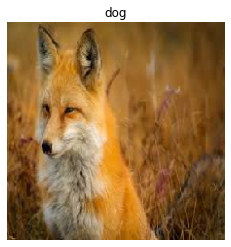

In [12]:
plt.title(labels[np.argmax(Fox)])
plt.axis('off')
plt.imshow(img.reshape(224,224,3).astype('uint8'))